In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('D:\ML_workspace\Fake_news_Project\datasets\\train.csv')
df_test = pd.read_csv('D:\ML_workspace\Fake_news_Project\datasets\\test.csv')

In [3]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
df_train.shape

(20800, 5)

In [6]:
df_test.shape

(5200, 4)

In [7]:
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

## Working on training data

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
X = df_train.drop(['label'], axis = 1)
X.head()


,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [11]:
y = df_train['label']

In [12]:
# xyz = []

# for i in X.text[:]:
#     if type(i) == str:
#         pass
#     else:
#         xyz.append(i)
        
# len(xyz)

In [13]:
X = X.fillna(' ')

In [14]:
X.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [15]:
# to make sure everything is in string type
X.text.astype(str)

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object

In [16]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [18]:
X.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...


In [19]:
X.shape

(20800, 4)

In [20]:
messages = X.copy()

In [21]:
messages.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...


In [22]:
len(messages)

20800

In [23]:
messages.shape

(20800, 4)

In [24]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Creating a corpus
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    # substituing the regular expression
    reviews = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    # make everything to lower again
    reviews = reviews.lower()
    # making split possible, such that we can implement porter stemming
    reviews = reviews.split()
    # applying steming and ignoring the stops words, we will append it into a list and make reviews = []
    reviews = [ps.stem(word) for word in reviews if not word in stopwords.words('english')]
    # join the reviews back again
    reviews = ' '.join(reviews)
    # appending into the corpus list
    corpus.append(reviews)

In [25]:
len(corpus)

20800

In [26]:
# now we will apply countvectoriztion for bag of words to get the top 5000 features.
# we will prefer (1,3) and 5000 features max.
# ngram ----> (1,3) will mean with 1 word, with 2 continuos word, with 3 continuous words.
from sklearn.feature_extraction.text import CountVectorizer

cv_model = CountVectorizer(ngram_range = (1,3), max_features = 5000)
X = cv_model.fit_transform(corpus)

In [27]:
cv_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [28]:
# cv_model.get_feature_names()

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbart',
 'agent',
 'aggress',
 'ago',
 'agre

In [29]:
type(X) # ------> scipy.sparse.csr.csr_matrix

scipy.sparse.csr.csr_matrix

In [30]:
X = X.toarray()

In [31]:
type(X), type(y)

(numpy.ndarray, pandas.core.series.Series)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state = 42 )


In [33]:
type(X_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [34]:
# Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1. Applying multinomialNB to our data

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [36]:
X_train.shape

(13936, 5000)

Accuracy Score : 0.911
Confusion matrix, without normalization


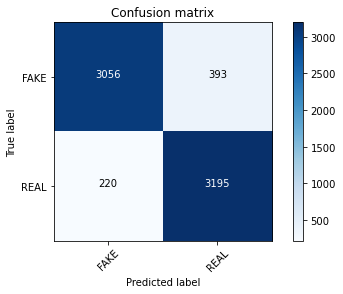

In [37]:
model_mnb = MultinomialNB()
model_mnb.fit(X_train,y_train)
y_pred_mnb = model_mnb.predict(X_test)

acc_mnb = accuracy_score(y_test, y_pred_mnb)
acc_mnb = np.round(acc_mnb, 3)
print("Accuracy Score : {}".format(acc_mnb))


cm = confusion_matrix(y_test, y_pred_mnb)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


## 2. Multinomial Naive bayes with alpha parameter

In [38]:
for i in np.arange(0,1,0.1):
    model_mnb_param = MultinomialNB(alpha=i)
    model_mnb_param.fit(X_train,y_train)
    y_pred_mnb_param = model_mnb_param.predict(X_test)
    score_param = accuracy_score(y_test, y_pred_mnb_param)
    print("accuracy score with alpha {} : {}".format(i, score_param))

C:\Anaconda3\envs\nlp\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


accuracy score with alpha 0.0 : 0.9015151515151515
accuracy score with alpha 0.1 : 0.9102564102564102
accuracy score with alpha 0.2 : 0.9108391608391608
accuracy score with alpha 0.30000000000000004 : 0.9102564102564102
accuracy score with alpha 0.4 : 0.909965034965035
accuracy score with alpha 0.5 : 0.909965034965035
accuracy score with alpha 0.6000000000000001 : 0.9101107226107226
accuracy score with alpha 0.7000000000000001 : 0.9102564102564102
accuracy score with alpha 0.8 : 0.9090909090909091
accuracy score with alpha 0.9 : 0.9104020979020979


Accuracy Score: 0.9108391608391608
Confusion matrix, without normalization


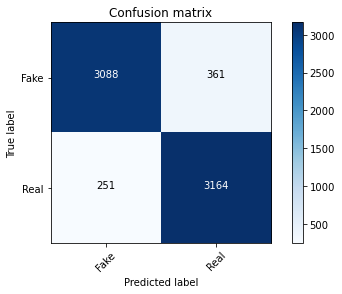

In [39]:
matrix = confusion_matrix(y_test, MultinomialNB(alpha=0.2).fit(X_train,y_train).predict(X_test))

score_multi_param = accuracy_score(y_test, MultinomialNB(alpha=0.2).fit(X_train,y_train).predict(X_test))
print("Accuracy Score: {}". format(score_multi_param))
plot_confusion_matrix(matrix, classes=['Fake', 'Real'])

## 3. Applying Passive agressive classifier model on our data

Accuracy Score : 0.924
Confusion matrix, without normalization


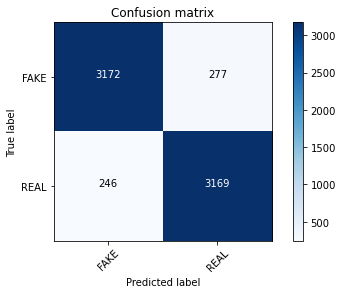

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier

model_pac = PassiveAggressiveClassifier()
model_pac.fit(X_train,y_train)
y_pred_pac = model_pac.predict(X_test)

acc_pac = accuracy_score(y_test, y_pred_pac)
acc_pac = np.round(acc_pac, 3)
print("Accuracy Score : {}".format(acc_pac))


cm_pac = confusion_matrix(y_test, y_pred_pac)
plot_confusion_matrix(cm_pac, classes=['FAKE', 'REAL'])

# Final : Detecting fake vs Real

In [41]:
# from countvectorizer.....we get feature names and from any one classsifier model we get the coefficient values

feature_name = cv_model.get_feature_names()

In [43]:
model_pac.coef_

array([[-1.15604854, -1.08724477,  0.        , ..., -0.27592649,
         0.47640784,  0.06922956]])

In [44]:
model_pac.coef_.shape


(1, 5000)

In [45]:
# These are the values with names that are true news.

sorted(zip(model_pac.coef_[0], feature_name), reverse =True)[:20]

[(3.3935863866606084, 'elderli'),
 (3.22547191443343, 'invis'),
 (3.1745318394813666, 'journal'),
 (3.1387809979282797, 'subject'),
 (3.0019460101295943, 'power'),
 (2.9014549327492234, 'hardest'),
 (2.842799255670838, 'women minor'),
 (2.7575086441023724, 'comment'),
 (2.699694032153283, 'calai'),
 (2.6394241100056, 'trump video'),
 (2.5655855756079196, 'hate speech'),
 (2.524364306590123, 'duke'),
 (2.439353359898553, 'undocu'),
 (2.43850844096193, 'jungl'),
 (2.398499820094988, 'negoti'),
 (2.360216900974136, 'shirt'),
 (2.3345266053855673, 'daesh'),
 (2.3297678210049058, 'suddenli'),
 (2.317437966729703, 'communist'),
 (2.278369691992277, 'idiot')]

In [46]:
# These are the news words that are Fake.

sorted(zip(model_pac.coef_[0], feature_name), reverse =True)[-20:]

[(-2.9471171255087123, 'grid'),
 (-2.987088196478518, 'cartel'),
 (-2.99063366386903, 'commiss'),
 (-3.075314454684398, 'islamist'),
 (-3.112147697936531, 'fate'),
 (-3.199547627045793, 'dutch'),
 (-3.219051190477961, 'virtual'),
 (-3.2220719670641076, 'cpac'),
 (-3.3425780182823046, 'delingpol'),
 (-3.402703343992947, 'macron'),
 (-3.427643062554267, 'twin'),
 (-3.4320501312169482, 'madonna'),
 (-3.4525247409331317, 'drag'),
 (-3.505857496641291, 'franc'),
 (-3.528961271945501, 'apolog'),
 (-3.5607570090117098, 'gorka'),
 (-3.5826581100381563, 'virgil'),
 (-3.9225699141593298, 'airlin'),
 (-4.060148918097481, 'festiv'),
 (-6.959169236517476, 'breitbart')]

## Using TFidf Vectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

model_tfidf = TfidfVectorizer(ngram_range = (1,3), max_features= 5000)
final_X = model_tfidf.fit_transform(corpus).toarray()

In [66]:
final_X.shape

(20800, 5000)

In [51]:
model_tfidf.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [55]:
len(model_tfidf.get_feature_names())

5000

In [56]:
y.shape

(20800,)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.33,random_state = 42)

In [58]:
count_df = pd.DataFrame(X_train, columns=model_tfidf.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy Score : 0.924
Confusion matrix, without normalization


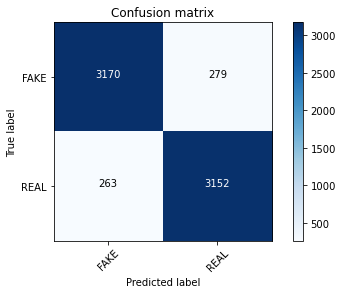

In [59]:
model_pac_text = PassiveAggressiveClassifier()
model_pac_text.fit(X_train,y_train)
y_pred_pac_text = model_pac_text.predict(X_test)

acc_pac_text = accuracy_score(y_test, y_pred_pac_text)
acc_pac_text = np.round(acc_pac, 3)
print("Accuracy Score : {}".format(acc_pac_text))


cm_pac_text = confusion_matrix(y_test, y_pred_pac_text)
plot_confusion_matrix(cm_pac_text, classes=['FAKE', 'REAL'])

In [60]:
for i in np.arange(0,1,0.1):
    model_mnb_param = MultinomialNB(alpha=i)
    model_mnb_param.fit(X_train,y_train)
    y_pred_mnb_param = model_mnb_param.predict(X_test)
    score_param = accuracy_score(y_test, y_pred_mnb_param)
    print("accuracy score with alpha {} : {}".format(i, score_param))

C:\Anaconda3\envs\nlp\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


accuracy score with alpha 0.0 : 0.8802447552447552
accuracy score with alpha 0.1 : 0.8904428904428905
accuracy score with alpha 0.2 : 0.8918997668997669
accuracy score with alpha 0.30000000000000004 : 0.8924825174825175
accuracy score with alpha 0.4 : 0.8936480186480187
accuracy score with alpha 0.5 : 0.8943764568764568
accuracy score with alpha 0.6000000000000001 : 0.8939393939393939
accuracy score with alpha 0.7000000000000001 : 0.8937937062937062
accuracy score with alpha 0.8 : 0.8943764568764568
accuracy score with alpha 0.9 : 0.8939393939393939


## In the very end, I got better results with countvectorizer itself.